In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib

def group_users_by_number_of_ratings(df):
    users_ratings = df.groupby('user_id').agg(
        rating_count=('item_id', 'count'),
    )
    users_ratings.sort_values(by='rating_count', inplace=True)
    users_ratings.reset_index(inplace=True)

    num_users_by_rating = users_ratings.groupby('rating_count').agg(
        num_users=('user_id', 'count'),
    )
    num_users_by_rating.reset_index(inplace=True)
    return num_users_by_rating
    

def group_users_by_number_of_plays(df):
    user_plays = df.groupby('user_id').agg(
        plays_count=('plays', 'sum'),
    )
    user_plays.sort_values(by='plays_count', inplace=True)
    user_plays.reset_index(inplace=True)

    num_users_by_plays = user_plays.groupby('plays_count').agg(
        num_users=('user_id', 'count'),
    )
    num_users_by_plays.reset_index(inplace=True)
    return num_users_by_plays

In [2]:
music_ratings_df = pd.read_csv('../datasets/lastfm/ratings.csv.gz')

In [3]:
music_ratings_df

,user_id,item_id,plays
0,0,0,2137
1,0,1,1099
2,0,2,897
3,0,3,717
4,0,4,706
...,...,...,...
17535650,358867,11175,12
17535651,358867,103076,11
17535652,358867,1687,11
17535653,358867,242,10


In [4]:
items_df = pd.read_csv('../datasets/lastfm/items.csv.gz')
items_df

,item_id,artist_name
0,0,betty blowtorch
1,1,die Ärzte
2,2,melissa etheridge
3,3,elvenking
4,4,juliette & the licks
...,...,...
295036,158,les braves
295037,158,martingo
295038,160111,sacred buddha
295039,160112,cat lunette


In [5]:
users_df = pd.read_csv('../datasets/lastfm/users.csv.gz')
users_df

,user_id,gender,age,country,signup
0,0,f,22.0,Germany,"Feb 1, 2007"
1,1,f,NaN,Canada,"Dec 4, 2007"
2,2,NaN,NaN,Germany,"Sep 1, 2006"
3,3,m,19.0,Mexico,"Apr 28, 2008"
4,4,m,28.0,United States,"Jan 27, 2006"
...,...,...,...,...,...
359342,358862,m,25.0,Germany,"Jun 24, 2006"
359343,358863,m,25.0,Brazil,"Sep 9, 2007"
359344,358864,m,20.0,United States,"Aug 8, 2007"
359345,358865,m,20.0,Russian Federation,"Dec 3, 2005"


In [6]:
# read csv without header, columns are:  user_id \t item_id \t artist_name \t plays
dataset_user_count = group_users_by_number_of_ratings(music_ratings_df)
dataset_user_play_count = group_users_by_number_of_plays(music_ratings_df)


In [7]:
dataset_user_count

,rating_count,num_users
0,1,35
1,2,54
2,3,54
3,4,68
4,5,75
...,...,...
123,131,2
124,132,1
125,139,1
126,150,1


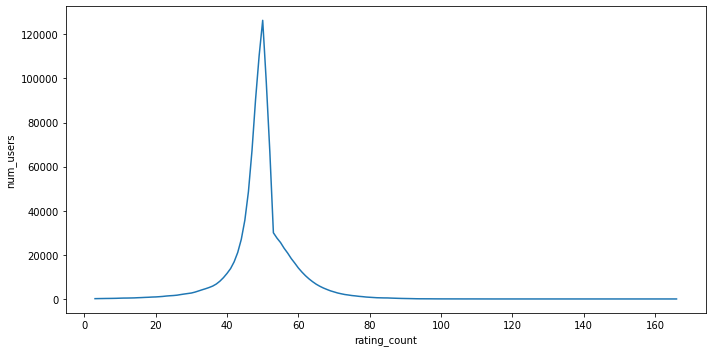

In [8]:

num_users_smooth_2 = dataset_user_count['num_users'].rolling(3).sum()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=dataset_user_count['rating_count'], y=num_users_smooth_2, ax=ax, legend=False)
plt.tight_layout()
plt.show()
fig.savefig('../figures/num_users_by_rating_count.pgf')

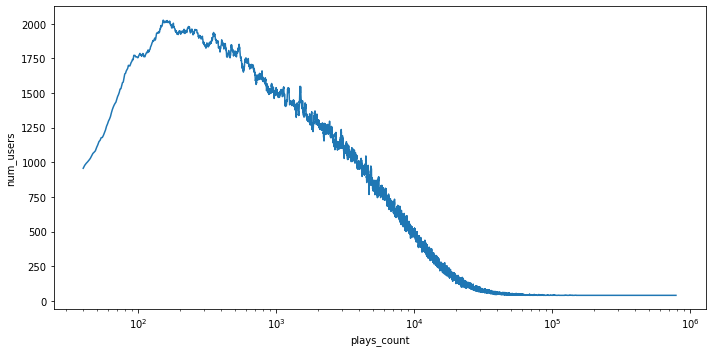

In [9]:

num_plays_smooth = dataset_user_play_count['num_users'].rolling(40).sum()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=dataset_user_play_count['plays_count'], y=num_plays_smooth, ax=ax, legend=False)
# set x axes to log scale
ax.set_xscale('log')
plt.tight_layout()
plt.show()
fig.savefig('../figures/num_users_by_rating_count.pgf')